In [3]:
pip install yfinance pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138892 sha256=55140a119ea2af9392d374043e28addb92d0c98ae8b4f372b4d3f4d861d30c89
  Stored in directory: /home/codespace/.cache/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


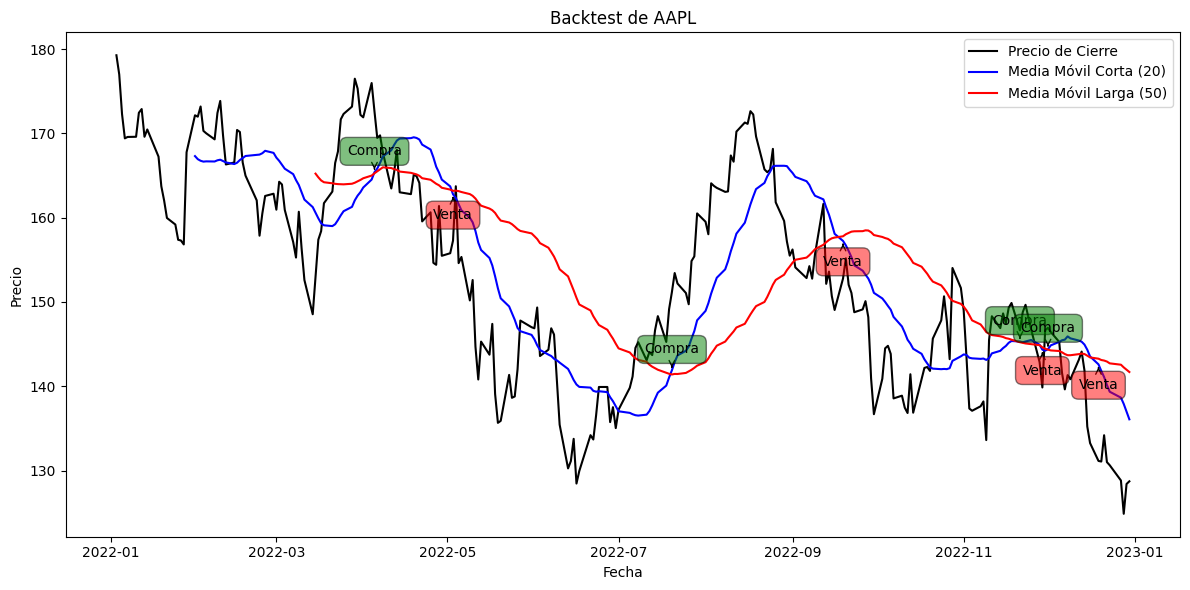

Retorno acumulado de la estrategia: -32.44%


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos de AAPL de Yahoo Finance
aapl = yf.Ticker("AAPL")
df = aapl.history(start="2022-01-01", end="2023-01-01")

# Calcular las medias móviles
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Calcular señales
df['Signal'] = 0
df.loc[df['SMA20'] > df['SMA50'], 'Signal'] = 1  # Señal de compra
df.loc[df['SMA20'] < df['SMA50'], 'Signal'] = -1  # Señal de venta

# Identificar puntos de cruce (cambios en la señal)
df['Position'] = df['Signal'].diff()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar las líneas
ax.plot(df.index, df['Close'], label='Precio de Cierre', color='black')
ax.plot(df.index, df['SMA20'], label='Media Móvil Corta (20)', color='blue')
ax.plot(df.index, df['SMA50'], label='Media Móvil Larga (50)', color='red')

# Graficar los puntos de compra y venta
compras = df[df['Position'] == 2]  # Cambio de -1 a 1
ventas = df[df['Position'] == -2]  # Cambio de 1 a -1

for idx, row in compras.iterrows():
    ax.annotate('Compra', xy=(idx, row['SMA20']), xytext=(0, 10), 
                textcoords='offset points', ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for idx, row in ventas.iterrows():
    ax.annotate('Venta', xy=(idx, row['SMA20']), xytext=(0, -10), 
                textcoords='offset points', ha='center', va='top',
                bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.5),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Configurar el gráfico
ax.set_title('Backtest de AAPL')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Calcular y mostrar el retorno acumulado
df['Returns'] = df['Close'].pct_change()
df['Strategy'] = df['Signal'].shift(1) * df['Returns']
cumulative_return = (1 + df['Strategy']).cumprod().iloc[-1] - 1
print(f"Retorno acumulado de la estrategia: {cumulative_return:.2%}")